In [1]:
import cv2
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
C:\Users\LEGION\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\LEGION\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\LEGION\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\LEGION\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [2]:
img_width, img_height = 100, 100
batch_size = 64

In [3]:
train_data_dir = 'C:/Users/LEGION/OneDrive/Desktop/fruits-360/Training'
test_data_dir = 'C:/Users/LEGION/OneDrive/Desktop/fruits-360/Test'

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    #class_mode='categorical')
    class_mode='categorical')

Found 67692 images belonging to 131 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    #class_mode='categorical')
    class_mode='categorical')

Found 22688 images belonging to 131 classes.


In [8]:
fruit_model=Sequential()
fruit_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height,3)))
fruit_model.add(MaxPooling2D(pool_size=(2, 2)))
fruit_model.add(Dropout(0.2))

fruit_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
fruit_model.add(MaxPooling2D(pool_size=(2, 2)))
fruit_model.add(Dropout(0.2))

fruit_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
fruit_model.add(MaxPooling2D(pool_size=(2, 2)))
fruit_model.add(Dropout(0.2))

fruit_model.add(Flatten())

fruit_model.add(Dense(512, activation='relu'))
fruit_model.add(Dense(131, activation='softmax'))

In [9]:
fruit_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
fruit_model_info = fruit_model.fit_generator(
        train_generator,
        steps_per_epoch=67692 // 64,
        epochs=5,
        validation_data=test_generator,
        validation_steps=22.688 // 64)
fruit_model.save_weights('fruit_model.h5')


Epoch 1/5
1057/1057 [==============================] - 506s 479ms/step - loss: 1.8273 - accuracy: 0.5276 - val_loss: 0.8729 - val_accuracy: 0.7504
Epoch 2/5
1057/1057 [==============================] - 170s 161ms/step - loss: 0.3899 - accuracy: 0.8777 - val_loss: 1.2159 - val_accuracy: 0.8286
Epoch 3/5
1057/1057 [==============================] - 165s 156ms/step - loss: 0.2059 - accuracy: 0.9349 - val_loss: 0.1675 - val_accuracy: 0.8836
Epoch 4/5
1057/1057 [==============================] - 165s 156ms/step - loss: 0.1370 - accuracy: 0.9566 - val_loss: 0.3061 - val_accuracy: 0.8934
Epoch 5/5
1057/1057 [==============================] - 165s 156ms/step - loss: 0.0963 - accuracy: 0.9698 - val_loss: 0.5390 - val_accuracy: 0.8609


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]]
[[1.80695656e-06 8.51029472e-05 1.

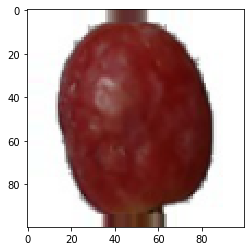

In [61]:
import matplotlib.pyplot as plt
x_batch, y_batch = next(train_generator)
for i in range (0,1):
    image = x_batch[i]
    label = y_batch[i]
    print (label)
    print(numpy.array([image]))
    print(fruit_model.predict(numpy.array([image])))
    plt.imshow(image)
    plt.show()

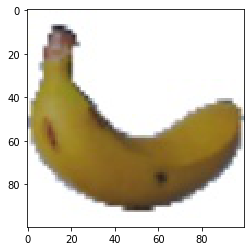

In [67]:
import matplotlib.pyplot as plt

#img = plt.imread('walnut.jpg')
#img = plt.imread('apple.jpg')
img = plt.imread('banana.jpg')
rows,cols,colors = img.shape # gives dimensions for RGB array
img_size = rows*cols*colors
img_1D_vector = img.reshape(img_size)
# you can recover the orginal image with:
img2 = img_1D_vector.reshape(rows,cols,colors)
img2=img2*(1./255)
img2 = numpy.expand_dims(img2, axis=0)
fruit_model.predict(img2)
plt.imshow(img)

In [68]:
maxindex=numpy.argmax(fruit_model.predict(img2))
maxindex

16